<a href="https://colab.research.google.com/github/gsurend4/BackPropogration/blob/main/02_Neural_Network_classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

1. Binary Classification (e.g Spam or Not Spam) -- Comparison on this or that (2)
2. Multiclass Classification  (e.g Biriayani, Kabab, friedrice) -- Comparison on `multiCategory` object (Morethan onething or the another) -- e.g - Imagenet
3. Multilabel Classification (e.g Tags for a Particular topic Deeplearning - Machine Learning, Artificial Intelligence, AI)

## Toy Dataset Creation - Make Circles

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
 # No of samples
n_samples = 1000

X, y = make_circles(n_samples=n_samples,
                              noise=0.03,
                              random_state=42)

X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

## Create a DataFrame to look into the data

In [ ]:
import pandas as pd

circles_df = pd.DataFrame({'X1' : X[:, 0], # X[row_index, column_index]
                           'X2' : X[:, 1],
                           'label' : y})

circles_df[:10]

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   label   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [ ]:
circles_df.describe()

,X1,X2,label
count,1000.000000,1000.000000,1000.00000
mean,-0.000448,-0.000804,0.50000
std,0.639837,0.641156,0.50025
min,-1.059502,-1.067768,0.00000
25%,-0.619251,-0.612176,0.00000
50%,0.008762,-0.003949,0.50000
75%,0.621933,0.624822,1.00000
max,1.033712,1.036004,1.00000


In [ ]:
circles_df.label.value_counts()

,count
label,
1,500
0,500


Since I cannot make any conclusive note here I am trying to create a visualization plot

## Visualization Plot

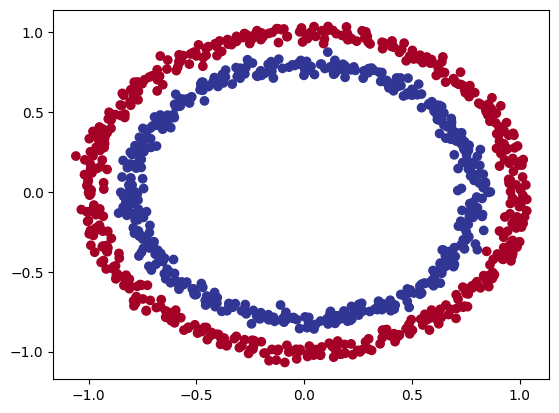

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

plt.show()

## Converting from numpy array to Tensor

In [ ]:
import torch

from torch import nn

torch.__version__

'2.9.0+cpu'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X = torch.from_numpy(X).type(torch.float) # from numpy to tensor conversion
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

## 1. Splitting Data (Train & Test split)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2, # value should be between 0 to 1 and it represents percentange so here it is 20%
                                                    random_state = 42 # This parameter sets the randomness of the data selection
                                                    )

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

## 2. Building a Classification Model

### Tradition Way in creating the Model (Creating the Class)

In [ ]:
# Setting up Device agnotistic Code

device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cpu'

In [ ]:
# Binary Classification Model (Traditional Method)
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__() # nn.Module Constructor

        # Hidden Layer
        self.layer_1 = nn.Linear(in_features=2,
                                 out_features=5) # default : requires_grad = True
        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=1) # Binary Classification

    # forward pass for CircleModelV0
    def forward(self, x : torch.tensor) -> torch.tensor:
        return self.layer_2(self.layer_1(x)) # Passing values from layer_1 to layer_2

In [ ]:
CircleModelV0()

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0 = CircleModelV0()

model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.1559, -0.6559],
                      [ 0.4490, -0.6261],
                      [-0.4852,  0.1792],
                      [ 0.1258,  0.1685],
                      [-0.1624,  0.6027]])),
             ('layer_1.bias',
              tensor([-0.3651,  0.0938,  0.3841,  0.1568,  0.0806])),
             ('layer_2.weight',
              tensor([[ 0.1919, -0.2142,  0.3716,  0.1176,  0.2248]])),
             ('layer_2.bias', tensor([0.3688]))])

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Move my model from CPU to GPU(cude)

model_0.to(device)

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

### Alternative Way to create a Model (nn.Sequential)

In [ ]:
# Ideally used for small models
# Order in which the parameters(Layers) are passed are maintained and followed

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4353, -0.6229],
                      [-0.3208, -0.1196],
                      [ 0.2305, -0.2994],
                      [-0.5660, -0.6626],
                      [ 0.1029,  0.5485]])),
             ('0.bias', tensor([-0.4819, -0.2228,  0.3833, -0.3504,  0.5908])),
             ('1.weight',
              tensor([[-0.2654,  0.0742,  0.4403,  0.4294,  0.1734]])),
             ('1.bias', tensor([-0.4303]))])

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Set up device agnostic code and Move the Model

device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cpu'

In [ ]:
# Move the Model to Cuda

model_0.to(device)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

### Model Mini Test

In [ ]:
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))

untrained_preds[:10]

tensor([[-0.2120],
        [-0.3604],
        [ 0.0386],
        [-0.2824],
        [-0.1815],
        [-0.2704],
        [-0.5140],
        [-0.4935],
        [ 0.0475],
        [-0.3728]])

In [ ]:
print(f"Output shape of the Untrained forward pass : {untrained_preds.shape}")
print(f"Output shape of the y_test : {y_test.shape}")

Output shape of the Untrained forward pass : torch.Size([200, 1])
Output shape of the y_test : torch.Size([200])


In [ ]:
y_test[:50]

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.])

**Observation**

1. The Predicted Value is not matching with the expected Value

### Setting up Loss function and Optimizer

1. Loss function
    - Cross Entropy Loss function (for Classification)
    - Binary Cross Entropy Loss function (for Binary Classification)
    
    **Entropy - spontaneous changes that occur in everyday phenomena**

2. Optimizer
    - SGD (stochistic gradient Descent).
    - SGD selects random samples of parameters and try to change its parameter based on the calculated gradients.


In [ ]:
# Logits : It is nothing but the raw output from the forward pass (before passing into output activation function like Sigmoid and softmax function)
loss_fn = nn.BCEWithLogitsLoss() # Recommended Loss function for classification Model
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
with torch.inference_mode():
  logits = model_0(X_test).to(device) # Raw output from the forward pass

# To Normalize the Values I need to pass them into Output activation function (sigmoid)
y_pred_prob = torch.sigmoid(logits)

y_pred_prob[:5]


# To label the Output Probabolities according to the True Output(Expected)
y_pred = torch.round(y_pred_prob)

y_pred[:15]

# Full Compute
y_pred_label = torch.round(torch.sigmoid(model_0(X_test).to(device)))

# Computes element wise equality
# Comparing full compute and regular compute
torch.eq(y_pred, y_pred_label)[:5]

tensor([[True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
# Accuracy Calculation
# Why it is needed? --> It helps us to find how much good our model is

def Accuracy(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = (correct / len(y_pred)) * 100
    return accuracy

In [ ]:
# Shape of y_test
print(f"Shape of y_test : {y_test.shape}")

# Shape of y_pred
print(f"Shape of y_pred_labels : {y_pred_label.shape}")

# Calculate the Accuracy percantage
accuracy = Accuracy(y_test.squeeze(), y_pred_label.squeeze()) # Due to the shape inconsistancy we are reducing a single dimension in y_pred_label and making it inaccordance with y_test
print(f"The Percentage of the Correct Prediction is : {accuracy}%")


Shape of y_test : torch.Size([200])
Shape of y_pred_labels : torch.Size([200, 1])
The Percentage of the Correct Prediction is : 50.5%


### Building a Training and Testing Loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# HyperParameter
Epochs = 100

# Device agnostic code for data movement
X_train, y_test, X_test, y_test = X_train.to(device), y_test.to(device), X_test.to(device), y_test.to(device)

for epoch in range(Epochs):
    # 0. Training Mode
    model_0.train()

    # 1. Forward Pass
    logits = model_0(X_train).squeeze()
    y_pred_label = torch.round(torch.sigmoid(logits))

    # 2. Calculate the Loss and Accuracy
    loss = loss_fn(logits,
                    y_train)

    acc = Accuracy(y_true=y_train,
                   y_pred=y_pred_label) # To find how correct our Model is

    # 3. Optimizer Zero grad
    optimizer.zero_grad

    # 4. Backward Pass (Back Propogation)
    loss.backward()

    # 5. Gradient descent w = w - α (dou J / dou w)
    optimizer.step()

    # Testing Mode
    model_0.eval() # Evaluation Mode

    with torch.inference_mode(): # Context Manager

        # 1. Forward Pass
        test_logits = model_0(X_test).squeeze()
        test_pred_label = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the Loss
        test_loss = loss_fn(test_logits,
                            y_test)

        test_acc = Accuracy(y_true=y_test,
                            y_pred=test_pred_label)

    if epoch % 10 == 0:
        print(f"Epoch : {epoch}, Train_loss : {loss}, Train_Accuracy : {acc}, Test_loss : {test_loss}, Test_Accuracy : {test_acc}")


Epoch : 0, Train_loss : 0.7041777968406677, Train_Accuracy : 45.375, Test_loss : 0.696764349937439, Test_Accuracy : 50.5
Epoch : 10, Train_loss : 0.6988072395324707, Train_Accuracy : 50.0, Test_loss : 0.702809751033783, Test_Accuracy : 50.0
Epoch : 20, Train_loss : 0.6952778697013855, Train_Accuracy : 46.625, Test_loss : 0.7012048363685608, Test_Accuracy : 39.5
Epoch : 30, Train_loss : 0.6980751752853394, Train_Accuracy : 47.625, Test_loss : 0.7039841413497925, Test_Accuracy : 48.5
Epoch : 40, Train_loss : 0.7001917362213135, Train_Accuracy : 54.87499999999999, Test_loss : 0.7071228623390198, Test_Accuracy : 49.5
Epoch : 50, Train_loss : 0.6955716013908386, Train_Accuracy : 50.0, Test_loss : 0.6961238384246826, Test_Accuracy : 50.0
Epoch : 60, Train_loss : 0.6937705874443054, Train_Accuracy : 50.0, Test_loss : 0.6927284002304077, Test_Accuracy : 47.5
Epoch : 70, Train_loss : 0.6979691982269287, Train_Accuracy : 50.0, Test_loss : 0.7003941535949707, Test_Accuracy : 50.0
Epoch : 80, Trai

**Observation:**
1. The Network did not learn becuase we did not introduce Activation Function(Non-Linearity)
2. We are going to visualize the data by importing a plot function from `helper_functions.py` - http://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

### Downloading "Helper functions"

In [ ]:
import requests # To request the page
from pathlib import Path # To Save in the respective Path

if Path('helper_functions.py').is_file():
    print('File Already exsist you can import the required functions')
else:
    # requesting the content
    helper_functions_response = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")

    # Save the Contents in a File
    with open('helper_functions.py', 'wb') as f:
        f.write(helper_functions_response.content) # or .text will also work for string contents

from helper_functions import plot_predictions, plot_decision_boundary

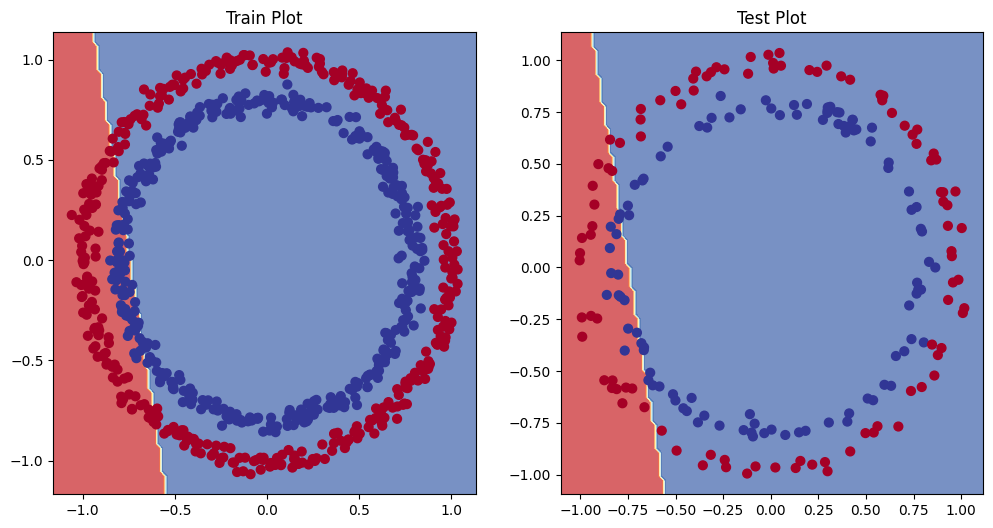

In [ ]:
# Sub Plotting

plt.figure(figsize=(12,6))

# Plot Train
plt.subplot(1, 2, 1)
plt.title('Train Plot')
plot_decision_boundary(model=model_0,
                       X=X_train,
                       y=y_train)

# Plot Test
plt.subplot(1, 2, 2)
plt.title('Test Plot')
plot_decision_boundary(model=model_0,
                       X=X_test,
                       y=y_test)

# plt.legend()

**Observation:**

1. We can clearly see from the image that the model is dividing the Image into 2 (Trying to Linearly Seperate).
2. We need to perform Hyper Parameter Tuning

### Hyper Parameters Tuning

1. Changing the Batch Size
2. Increasing/Decreasing the Inner No of Neuron/Hidden Parameters
3. Increasing/decreasing the No of Hidden layers
4. Fit for Longer
4. Change Activation function
3. Change the Learning rate.
5. Change the Optimization function (According to the Problem)
6. Change the Loss function (According to the Problem)

#### Re-writing the Model by increasing the no of Layers and Neurons

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1) # Binary Classification

    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.layer3(self.layer2(self.layer1(x))) # Internal __call__ will call forward method

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create a Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [ ]:
# Training and Testing Loop for the New Model - model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

Epochs = 1000

# Device agnostic code for data movement
X_train, y_test, X_test, y_test = X_train.to(device), y_test.to(device), X_test.to(device), y_test.to(device)

for epoch in range(Epochs):
    # 0. Train Mode
    model_1.train()

    # 1. Forward Pass
    logits = model_1(X_train).squeeze()
    y_pred_label = torch.round(torch.sigmoid(logits))

    # 2. Calculate the Loss and Accuracy
    loss = loss_fn(y_pred_label,
                   y_train)

    acc = Accuracy(y_true=y_train,
                   y_pred=y_pred_label)

    # 3. Optimizer Zero grad
    optimizer.zero_grad

    # 4. Loss backward (Back Propogation)
    loss.backward()

    # 5. Optimzer Step (Gradient Descent)
    optimizer.step()

    # Testing Mode
    model_1.eval() # Evaluation Mode

    with torch.inference_mode(): # Context Manager

        # 1. forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred_label = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the Loss and accuracy
        test_loss = loss_fn(test_logits,
                            y_test)

        test_acc = Accuracy(y_true=y_test,
                            y_pred=test_pred_label)

    if epoch % 100 == 0:
        print(f"Epoch : {epoch}, Train_loss : {loss:.5f}, Train_Accuracy : {acc:.2f}%, Test_loss : {test_loss:.5f}, Test_Accuracy : {test_acc:.2f}%")


Epoch : 0, Train_loss : 0.75769, Train_Accuracy : 50.88%, Test_loss : 0.69261, Test_Accuracy : 51.00%
Epoch : 100, Train_loss : 0.75769, Train_Accuracy : 50.88%, Test_loss : 0.69261, Test_Accuracy : 51.00%
Epoch : 200, Train_loss : 0.75769, Train_Accuracy : 50.88%, Test_loss : 0.69261, Test_Accuracy : 51.00%
Epoch : 300, Train_loss : 0.75769, Train_Accuracy : 50.88%, Test_loss : 0.69261, Test_Accuracy : 51.00%
Epoch : 400, Train_loss : 0.75769, Train_Accuracy : 50.88%, Test_loss : 0.69261, Test_Accuracy : 51.00%
Epoch : 500, Train_loss : 0.75769, Train_Accuracy : 50.88%, Test_loss : 0.69261, Test_Accuracy : 51.00%
Epoch : 600, Train_loss : 0.75769, Train_Accuracy : 50.88%, Test_loss : 0.69261, Test_Accuracy : 51.00%
Epoch : 700, Train_loss : 0.75769, Train_Accuracy : 50.88%, Test_loss : 0.69261, Test_Accuracy : 51.00%
Epoch : 800, Train_loss : 0.75769, Train_Accuracy : 50.88%, Test_loss : 0.69261, Test_Accuracy : 51.00%
Epoch : 900, Train_loss : 0.75769, Train_Accuracy : 50.88%, Test_l

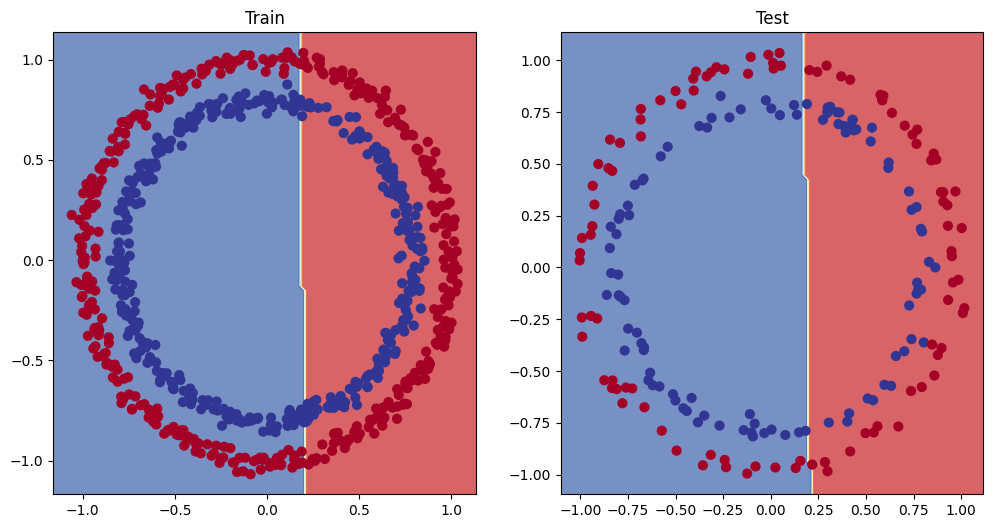

In [ ]:
# Plotting the 2nd Model descision boundary

plt.figure(figsize=(12,6))

# 1st Train plot
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model=model_1,
                       X=X_train,
                       y=y_train)

# 2nd Test plot
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model=model_1,
                       X=X_test,
                       y=y_test)

**Observation:**

1. Still the Model is just creating a Linear Line to Split the data which is Incorrect.
2. So Introducing Non-Linearity (Activation Functions - tanh, Relu)

### Creating a Neural Network using Activation Function

#### Creating a Sample DataSet

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
# Creating Sample Dataset from sklearn

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

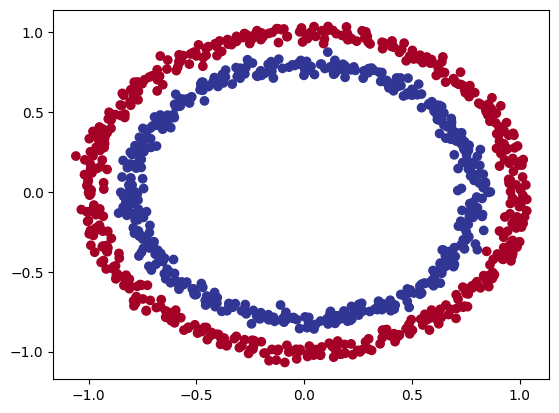

In [ ]:
# Visualization

plt.scatter(X[:, 0], # Feature 1
            X[:, 1], # Feature 2
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# Converting Numpy Array into Tensor

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Splitting the Data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# Device agnostic Code

device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

'cpu'

In [ ]:
# Creating the Model with Relu Activation Function

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    # Forward Pass
    def forward(self, x:torch.tensor) -> torch.tensor:
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup the Loss Function and Optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [ ]:
# Training and Testing Loop in a Non-Linearity Model

# Reproducability
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Move the Data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Hyper Parameter
Epochs = 1000

# Training Loop
for epoch in range(Epochs):
    # Training Mode
    model_3.train()

    # 1. Forward Pass
    logits = model_3(X_train).squeeze()
    y_pred_label = torch.round(torch.sigmoid(logits)) # logits -> prediction probabilites -> prediction label

    # 2. Calculate the Loss
    loss = loss_fn(logits,
                   y_train)
    # accuracy calculation
    acc = Accuracy(y_pred=y_pred_label,
                   y_true=y_train)

    # 3. Zero Grad
    optimizer.zero_grad()

    # 4. Back Propogation
    loss.backward()

    # 5. Gradient Descent
    optimizer.step()

    #### Testing Mode
    model_3.eval() # Evaluation Mode

    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred_label = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the Loss and Accuracy
        loss = loss_fn(test_logits,
                       y_test)
        test_acc = Accuracy(y_pred=test_pred_label,
                            y_true=y_test)

    if epoch % 100 == 0:
        print(f"Epoch : {epoch}, Train_loss : {loss:.5f}, Train_Accuracy : {acc:.2f}, Test_loss : {test_loss:.5f}, Test_acc : {test_acc:.2f}")

Epoch : 0, Train_loss : 0.02450, Train_Accuracy : 100.00, Test_loss : 0.69261, Test_acc : 99.50
Epoch : 100, Train_loss : 0.02389, Train_Accuracy : 100.00, Test_loss : 0.69261, Test_acc : 99.50
Epoch : 200, Train_loss : 0.02331, Train_Accuracy : 100.00, Test_loss : 0.69261, Test_acc : 99.50
Epoch : 300, Train_loss : 0.02278, Train_Accuracy : 100.00, Test_loss : 0.69261, Test_acc : 99.50
Epoch : 400, Train_loss : 0.02228, Train_Accuracy : 100.00, Test_loss : 0.69261, Test_acc : 99.50
Epoch : 500, Train_loss : 0.02181, Train_Accuracy : 100.00, Test_loss : 0.69261, Test_acc : 99.50
Epoch : 600, Train_loss : 0.02137, Train_Accuracy : 100.00, Test_loss : 0.69261, Test_acc : 99.50
Epoch : 700, Train_loss : 0.02093, Train_Accuracy : 100.00, Test_loss : 0.69261, Test_acc : 99.50
Epoch : 800, Train_loss : 0.02053, Train_Accuracy : 100.00, Test_loss : 0.69261, Test_acc : 99.50
Epoch : 900, Train_loss : 0.02015, Train_Accuracy : 100.00, Test_loss : 0.69261, Test_acc : 99.50


Text(0.5, 1.0, 'Test')

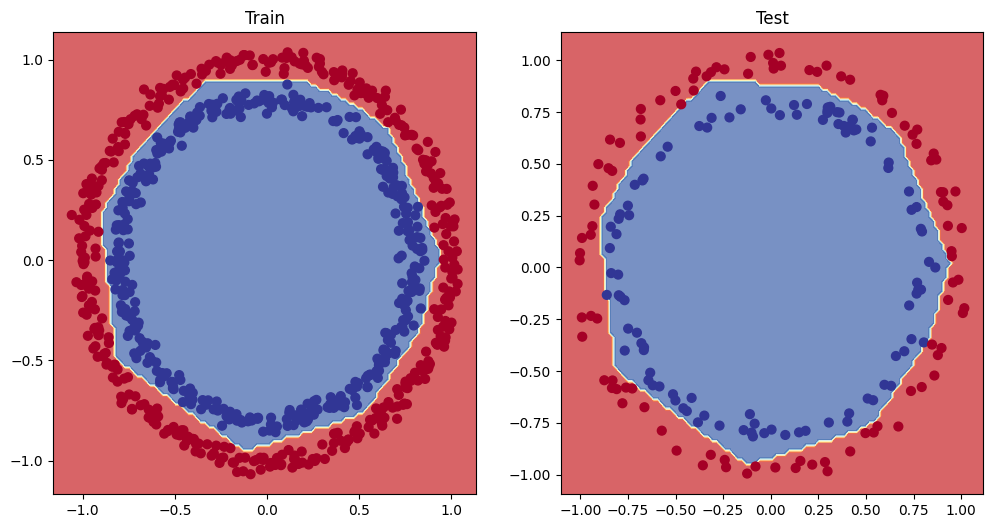

In [72]:
# Visualization

plt.figure(figsize=(12,6))

# 1st Plot Train data
plt.subplot(1, 2, 1)
plot_decision_boundary(model=model_3,
                       X=X_train,
                       y=y_train)
plt.title("Train")

# 2nd plot Test data
plt.subplot(1, 2, 2)
plot_decision_boundary(model=model_3,
                       X=X_test,
                       y=y_test)
plt.title("Test")